# **Business Understanding**

**Problem Statement**

The objective of this analysis is to examine sales performance, profitability, customer behavior, and operational efficiency using historical transaction data

**Business Goals**

- Identify profit leakage and loss-making orders
- Understand category and regional performance
- Analyze customer purchasing behavior
- Detect seasonal sales trends
- Provide actionable business recommendations

# **Data Understanding**

**Dataset Overview**

The dataset contains transactional sales data including customer details, product information, sales, profit, discounts, and order dates.

**Key Columns**

- Order Date
- Sales
- Profit
- Discount
- Category
- Region
- Customer Name

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv('Sample - Superstore.csv', encoding='latin1')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# **Data Cleaning**

 **Cleaning Objectives**

- Handle missing values
- Fix data types
- Remove inconsistencies
- Prepare data for analysis

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Sales']=pd.to_numeric(df['Sales'])
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


# **Feature Engineering**

**New Features Created**

- Profit Margin
- Profit Flag (Profitable / Loss)
- Order Month
- Order Year
- Order Qurter
- Shipping Delay (Days)
- Discount Band
- Sales Band
- Customer Lifetime Sales
- Customer Order Count
- Product Profitability
- Region Profit %

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
# yearly, Monthly & Quarterly analysis
df['Order Year']=df['Order Date'].dt.year

In [ ]:
df['Order Month']=df['Order Date'].dt.month

In [ ]:
df['Order Quarter']=df['Order Date'].dt.quarter

In [ ]:
# Logistics efficiency
df['Shipping Delay (Days)']=(df['Ship Date'] - df['Order Date']).dt.days

In [ ]:
# To analyze profit margin
df['Profit Margin']=df['Profit'] / df['Sales']

In [ ]:
#df['Profit Margin'] = df['Profit'] / df['Sales'].replace(0, 1)

In [ ]:
# Profit Flag
df['Profit Flag']=df['Profit'].apply(lambda x: 'Profitable' if x > 0 else 'Loss')

In [ ]:
# Dicount Band (To identify profit killing discounts)

def discount_band(x):
  if x == 0:
    return '0%'
  elif x <= 0.2:
    return '1-20%'
  elif x <= 0.4:
    return '21-40%'
  else:
    return '40%+'

df['Discount Band']=df['Discount'].apply(discount_band)

In [ ]:
# Sales Band (To make order value segmentation)
def Sales_band(x):
  if x < 100:
    return 'Low'
  elif x <= 500:
    return 'Medium'
  else:
    return 'High'

df['Sales Band']=df['Sales'].apply(Sales_band)

In [ ]:
# Customer Features
#customer liftime sales
df['Customer Lifetime Sales']=df.groupby('Customer ID')['Profit'].transform('sum')

In [ ]:
#Customer Order Frequency
df['Customer Order Count']=df.groupby('Customer ID')['Order ID'].transform('nunique')

In [ ]:
# Product Profitability Flag(Whether the product is profit-able or not)

df['Product Profitability']=df.groupby('Product Name')['Profit'].transform(lambda x: 'Profitable' if x.sum() > 0 else 'Loss')

In [ ]:
# Geographic Aggregates
df['Region Profit %']=df.groupby('Region')['Profit'].transform(lambda x: x / x.sum())

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Order Quarter,Shipping Delay (Days),Profit Margin,Profit Flag,Discount Band,Sales Band,Customer Lifetime Sales,Customer Order Count,Product Profitability,Region Profit %
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,4,3,0.1600,Profitable,0%,Medium,169.9344,3,Loss,0.000897
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,4,3,0.3000,Profitable,0%,High,169.9344,3,Profitable,0.004697
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,4,0.4700,Profitable,0%,Low,-427.1840,5,Profitable,0.000063
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,4,7,-0.4000,Loss,40%+,High,-81.0858,6,Loss,-0.008193
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,4,7,0.1125,Profitable,1-20%,Low,-81.0858,6,Profitable,0.000054


In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Quarter,Shipping Delay (Days),Profit Margin,Customer Lifetime Sales,Customer Order Count,Region Profit %
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686,2.882329,3.958175,0.120314,455.107659,7.356114,0.000400
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,1.000000,0.000000,-2.750000,-6626.389500,1.000000,-0.093232
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000,2.000000,3.000000,0.075000,86.510600,5.000000,0.000022
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000,3.000000,4.000000,0.270000,293.552400,7.000000,0.000113
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000,4.000000,5.000000,0.362500,707.550300,9.000000,0.000399
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,4.000000,7.000000,0.500000,8981.323900,17.000000,0.211552
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654,1.058086,1.747567,0.466754,949.264884,2.554198,0.004344


In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.to_csv('Superstore_Cleaned.csv', index=False)
files.download('Superstore_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Exploratory Data Analysis**

**Analysis Areas**
- Dataset Overview
- Summary Statistics
- Missing Values Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis
- Time Series Analysis
- Customer Analysis
- Margin Segmentation


In [ ]:
#Dataset Overview(Shape & Structure)

df.shape

(9994, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Row ID                   9994 non-null   int64         
 1   Order ID                 9994 non-null   object        
 2   Order Date               9994 non-null   datetime64[ns]
 3   Ship Date                9994 non-null   datetime64[ns]
 4   Ship Mode                9994 non-null   object        
 5   Customer ID              9994 non-null   object        
 6   Customer Name            9994 non-null   object        
 7   Segment                  9994 non-null   object        
 8   Country                  9994 non-null   object        
 9   City                     9994 non-null   object        
 10  State                    9994 non-null   object        
 11  Postal Code              9994 non-null   int64         
 12  Region                   9994 non-

In [ ]:
# summary Statistics (numeric undersatnding)

df[['Sales','Profit', 'Discount', 'Profit Margin', 'Shipping Delay (Days)']].describe()

,Sales,Profit,Discount,Profit Margin,Shipping Delay (Days)
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203,0.120314,3.958175
std,623.245101,234.260108,0.206452,0.466754,1.747567
min,0.444000,-6599.978000,0.000000,-2.750000,0.000000
25%,17.280000,1.728750,0.000000,0.075000,3.000000
50%,54.490000,8.666500,0.200000,0.270000,4.000000
75%,209.940000,29.364000,0.200000,0.362500,5.000000
max,22638.480000,8399.976000,0.800000,0.500000,7.000000


In [ ]:
# Missing values Analysis
#missing values were minimal & handled during feature engineering.!

df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


### Univariate Analysis

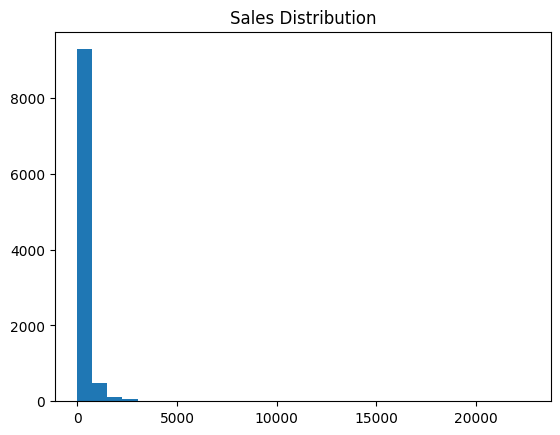

In [ ]:
# Sales Distribution
plt.hist(df['Sales'],bins=30)
plt.title('Sales Distribution')
plt.show()

Insight: Sales are heavily right-skewed, indicating that most orders are low-value while a small number of high-value transactions drive a large portion of total revenue.

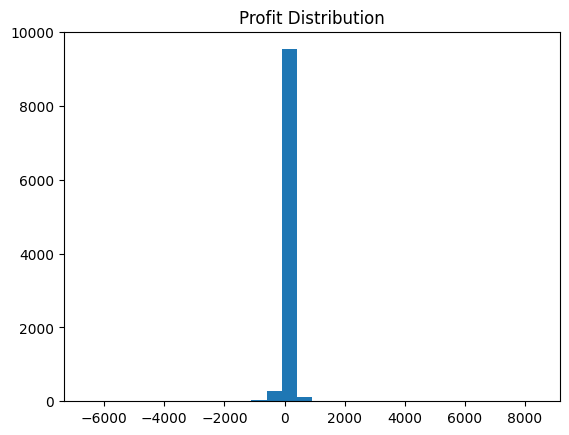

In [ ]:
# Profit Distribution
plt.hist(df['Profit'], bins=30)
plt.title('Profit Distribution')
plt.show()

Insight: Although sales volume is high, profitability varies significantly due to discounts and cost structures, resulting in loss-making and low-margin high-value orders

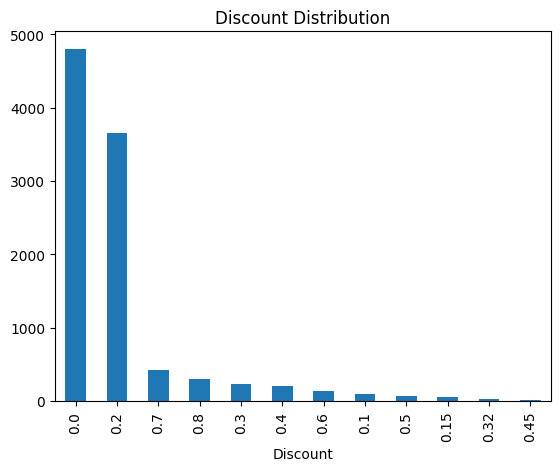

In [ ]:
# Discount Distribution
df['Discount'].value_counts().plot(kind='bar')
plt.title('Discount Distribution')
plt.show()

Insight: The bar plot shows most orders have low/no discounts as well as high discount orders are fewer but risky

### Bivariate Analysis

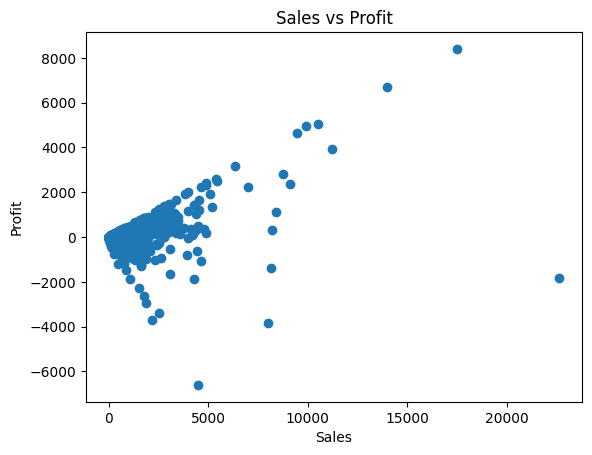

In [ ]:
plt.scatter(df['Sales'], df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.show()

Insight: Higher sales do not always translate into higher profit

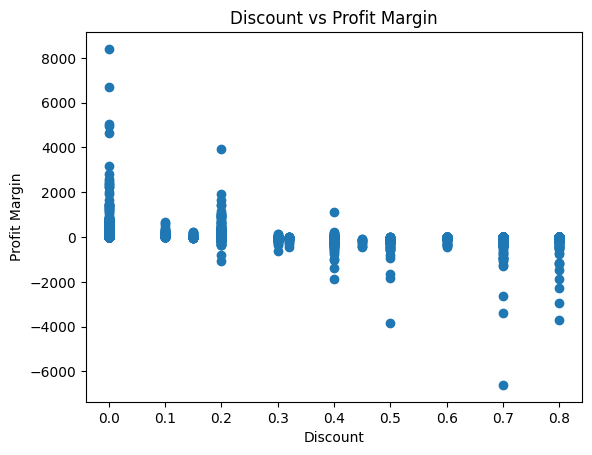

In [ ]:
# Discount Vs Profit Margin
plt.scatter(df['Discount'], df['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit Margin')
plt.title('Discount vs Profit Margin')
plt.show()

Key Insight: When discounts go beyond a certain level, the reduction in price becomes so large that it wipes out the profit, causing profit margins to drop quickly and even turn negative.

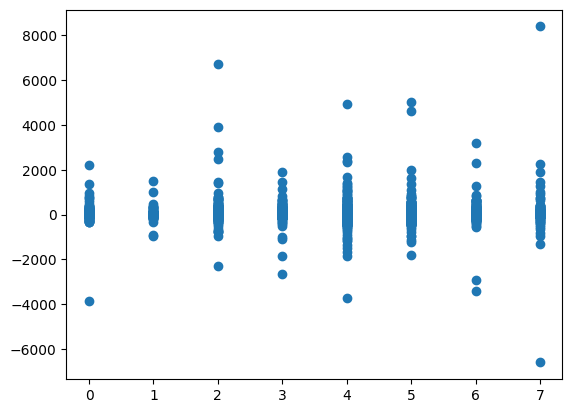

In [ ]:
# Shipping Delay Vs Profit
plt.scatter(df['Shipping Delay (Days)'], df['Profit'])
plt.show()

Insight: The scatter plot shows that operational delays are impacting profitability

### Multivariate Analysis


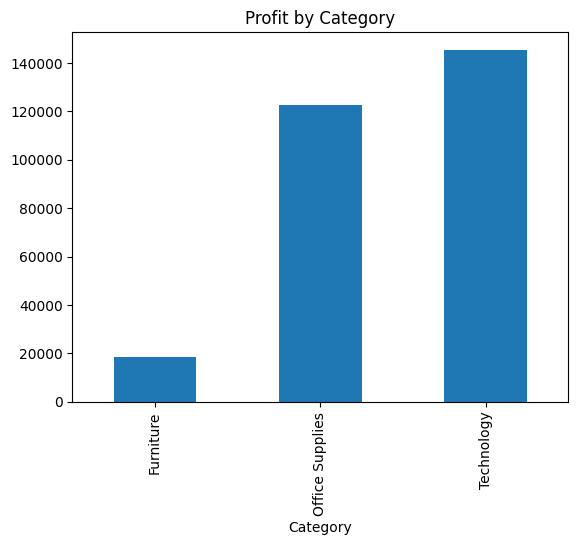

In [ ]:
# profit by category
df.groupby('Category')['Profit'].sum().plot(kind='bar')
plt.title('Profit by Category')
plt.show()

Insight: This bar plot indicating that Technology is the most profitable category, whereas Furniture consistently underperforms and drives losses.

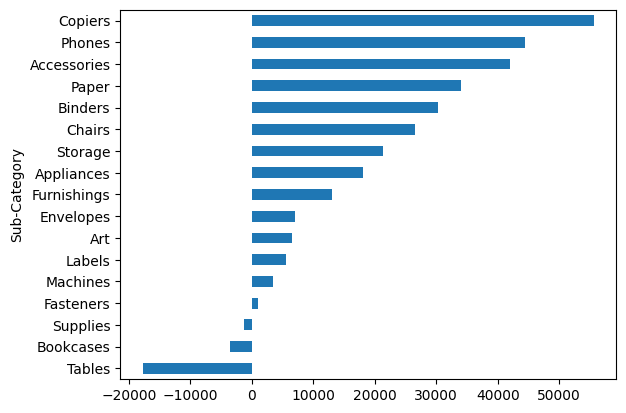

In [ ]:
#Profit by Sub-Category
df.groupby('Sub-Category')['Profit'].sum().sort_values().plot(kind='barh')
plt.show()

Insight: Identified that "Table" is the furniture's subcategory which is top loss-driving product

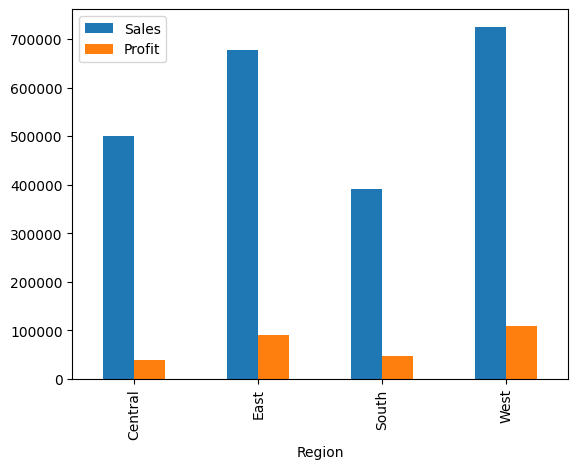

In [ ]:
#Region-wise Performance
df.groupby('Region')[['Sales', 'Profit']].sum().plot(kind='bar')
plt.show()

Insight: Regional analysis shows that strong sales performance does not consistently lead to high profitability.

### Time Series Analysis

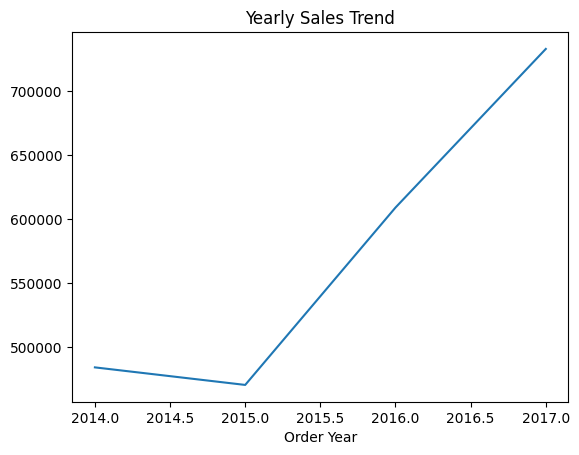

In [ ]:
# Sales Trend Over Time
df.groupby('Order Year')['Sales'].sum().plot()
plt.title('Yearly Sales Trend')
plt.show()

Insight: Identified long-term sales trends and recurring seasonal patterns to support forecasting and strategic planning.

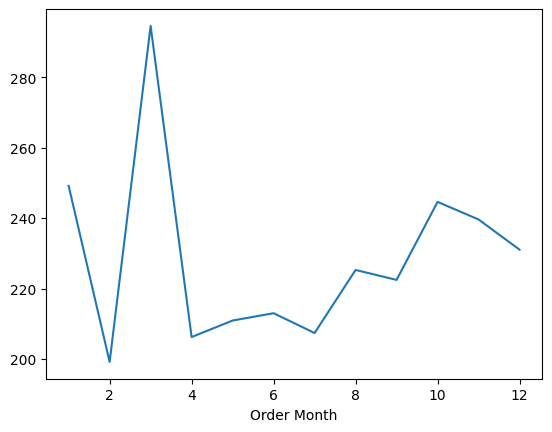

In [ ]:
# Monthly Sales Pattern
df.groupby('Order Month')['Sales'].mean().plot()
plt.show()

Insight: Sales peak during specific months due to seasonal demand patterns driven by recurring customer behavior

### Customer Analysis

In [ ]:
#Top customers by sales
df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(10)

,Sales
Customer ID,
SM-20320,25043.050
TC-20980,19052.218
RB-19360,15117.339
TA-21385,14595.620
AB-10105,14473.571
KL-16645,14175.229
SC-20095,14142.334
HL-15040,12873.298
SE-20110,12209.438


A small group of customers contributes a disproportionately large share of total sales, indicating high customer concentration risk

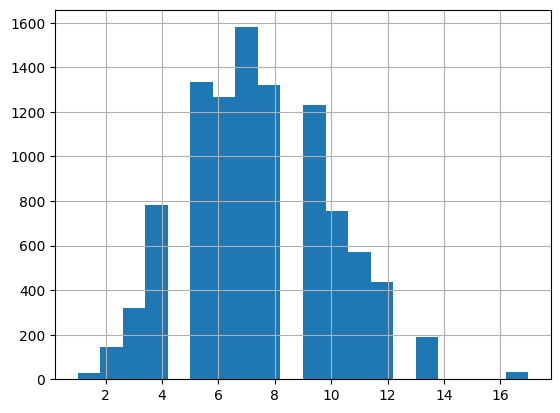

In [ ]:
# Order Frequency
df['Customer Order Count'].hist(bins=20)
plt.show()

The customer base is dominated by many one-time buyers, while only a small portion of customers show repeat or loyal purchasing behavior.

### Margin Segmentation

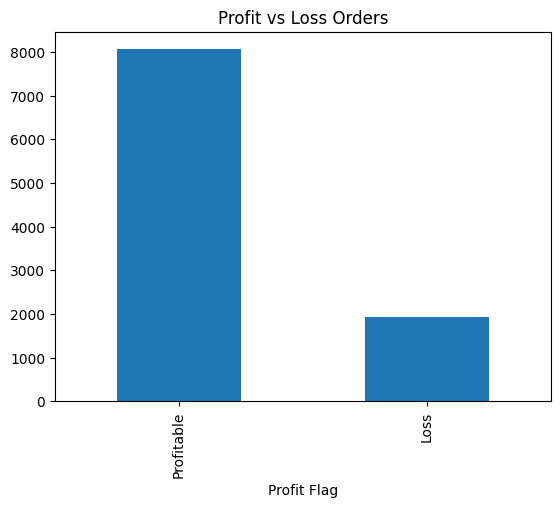

In [ ]:
df['Profit Flag'].value_counts().plot(kind='bar')
plt.title('Profit vs Loss Orders')
plt.show()

Most orders are profitable, but a meaningful portion still results in losses, indicating inefficiencies in pricing or discount strategies.

# **Business Insights & Recommendations**


 **Objective**

The objective of this phase is to translate analytical findings into meaningful business insights and actionable recommendations to improve sales performance, profitability, customer retention, and operational efficiency.

---

**Key Business Insights**

1. Sales Does Not Always Translate into Profit
- High sales orders are not consistently profitable.
- Several high-revenue transactions generate low or negative profit due to aggressive discounting and cost structures.

**Business Impact:**  
Revenue growth without profit growth can negatively affect long-term sustainability.

---

2. Presence of Loss-Making Orders
- A significant portion of orders result in losses.
- Loss-making transactions reduce overall profitability despite healthy sales volumes.

**Business Impact:**  
Uncontrolled loss orders indicate inefficiencies in pricing and discount strategies.

---

3. Category-Level Profitability Imbalance
- Technology products contribute the highest profits.
- Furniture products are frequently loss-making.

**Business Impact:**  
Capital allocation toward low-performing categories reduces overall return on investment.

---

4. Customer Concentration and Retention Risk
- A small group of customers contributes a large share of total sales.
- Majority of customers are one-time buyers, with limited repeat purchasing.

**Business Impact:**  
High dependency on few customers and low retention increase revenue volatility and acquisition costs.

---

5. Seasonal Sales Patterns
- Sales exhibit clear seasonality with identifiable peak months.
- Demand fluctuates significantly across the year.

**Business Impact:**  
Poor seasonal planning may lead to inventory inefficiencies and increased holding costs.

---

Actionable Recommendations

1. Optimize Discount Strategy
- Introduce category-specific discount limits.
- Avoid high discounts on low-margin products.

**Expected Outcome:** Improved profit margins and reduced loss orders.

---

2. Focus on High-Performing Categories
- Increase marketing and inventory focus on Technology products.
- Review pricing, logistics, and discount policies for Furniture.

**Expected Outcome:** Higher category-level profitability.

---

3. Improve Customer Retention
- Implement loyalty programs for repeat customers.
- Offer personalized promotions to high-value customers.

**Expected Outcome:** Increased repeat purchase rate and stable revenue.

---

4. Region-Specific Pricing and Cost Control
- Analyze and optimize pricing strategies at a regional level.
- Control logistics and operational costs in low-profit regions.

**Expected Outcome:** Balanced regional profitability.

---

5. Plan for Seasonal Demand
- Align inventory and staffing with peak sales months.
- Reduce stock levels during low-demand periods.

**Expected Outcome:**

 Lower operational costs and improved efficiency.

---

**Key KPIs to Monitor**

| KPI | Purpose |
|-----|--------|
| Profit Margin | Measure pricing and cost efficiency |
| Percentage of Loss Orders | Track profitability risks |
| Average Discount | Control margin erosion |
| Repeat Customer Rate | Measure customer loyalty |
| Category Profit Contribution | Optimize product portfolio |

---

**Executive Summary**

This analysis reveals that high sales volumes do not necessarily lead to high profitability. Profit leakage is primarily driven by discounting practices, category-level inefficiencies, and low customer retention. By implementing targeted discount controls, focusing on profitable categories, improving customer loyalty, and planning for seasonality, the business can significantly improve profitability and operational performance.

---

**Conclusion**

Phase 6 successfully transforms analytical insights into actionable business strategies, enabling data-driven decision-making that supports sustainable growth and profitability.
